In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

A = np.random.rand(400).reshape(20, 20)
x = np.random.rand(20)

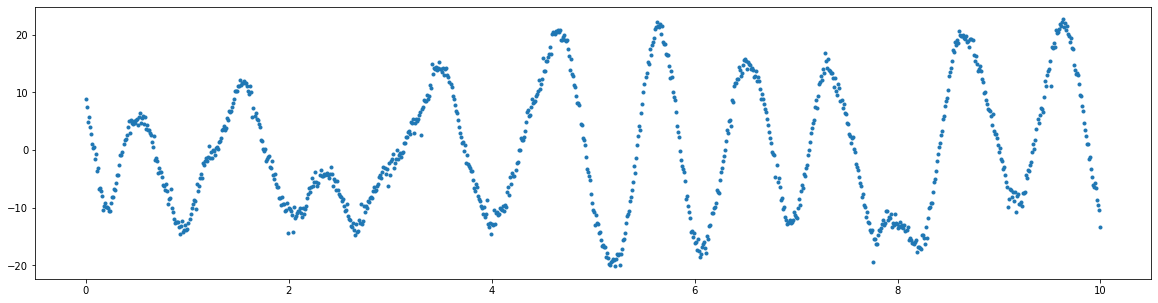

In [244]:
import celerite2

rho, tau, sigma, mean, diag = [1, 1, 10, 0.0, 0.5]
t = np.linspace(0, 10, 1000)
    
k = celerite2.terms.SHOTerm(
        rho=rho, 
        tau=tau, 
        sigma=sigma
    )
gp = celerite2.GaussianProcess(
    k, 
    t, 
    mean=mean, 
    diag=diag
)

y = gp.sample()
n_out = 20
inds = np.random.randint(len(t), size=n_out)

sign = [1 if x == 1 else -1 for x in np.random.randint(2, size=n_out)]
y[inds] += sign * (np.random.randn(n_out) * 0.5 + 3)

plt.figure(figsize=(20, 5))
plt.plot(t, y, '.')
#plt.plot(t[inds], y[inds], 'ro')

CPU times: user 109 ms, sys: 7.23 ms, total: 116 ms
Wall time: 143 ms


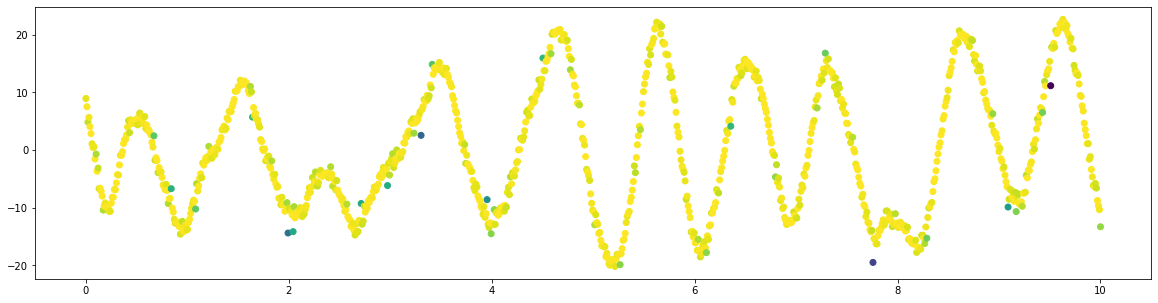

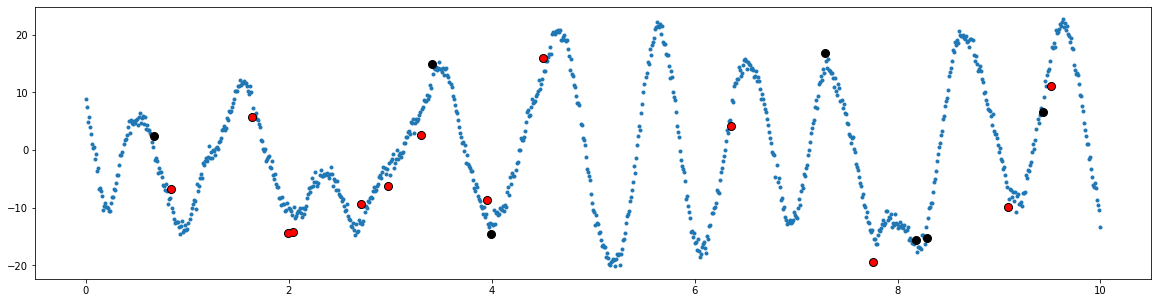

In [245]:
def f(d, x, gp, i):
    y = np.copy(x)
    y[i] += d
    return np.dot(y, gp.apply_inverse(y))

def min_d(x, gp, i):

    z = np.zeros_like(y)
    z[i] = 1.0
    
    kz = gp.apply_inverse(z)
    kx = gp.apply_inverse(x)
    dg = np.dot(z, kx) + np.dot(x + z, kz)
    aii = kz[i]
    
    return 0.5 - dg / (2 * aii)

def bic(x, kx, gp, i):
    
    z = np.zeros_like(y)
    z[i] = 1.0
    
    kz = gp.apply_inverse(z)
    dg = kx[i] + np.dot(x + z, kz)
    aii = kz[i]
    
    mind = 0.5 - dg / (2 * aii)
    
    return 2 * mind * (dg - aii + mind * aii) + np.log(len(x))

def aic(x, kx, gp, i):
    
    z = np.zeros_like(y)
    z[i] = 1.0
    
    kz = gp.apply_inverse(z)
    dg = kx[i] + np.dot(x + z, kz)
    aii = kz[i]
    
    mind = 0.5 - dg / (2 * aii)
    
    return 2 * mind * (dg - aii + mind * aii) + 2

ky = gp.apply_inverse(y)
%time b = np.array([bic(y, ky, gp, i) for i in range(len(y))])

plt.figure(figsize=(20, 5))
plt.scatter(t, y, c=b, cmap=plt.cm.viridis)

plt.figure(figsize=(20, 5))
plt.plot(t, y, '.')
plt.plot(t[inds], y[inds], 'ko', markersize=8)
plt.plot(t[b < -20], y[b < -20], 'ro')

In [ ]:
i = 4
delta = 1

y = np.copy(x)
y[i] += delta
xdAxd = np.dot(y, np.dot(A, y.T))
xdAxd

In [5]:
up = delta * (np.dot(x, A[:, i]) + np.dot(x, A[i, :]) + delta * A[i, i])

In [226]:
def up(delta, A, x, i):
    return delta * (np.dot(x, A[:, i]) + np.dot(x, A[i, :]) + delta * A[i, i])

In [228]:
i = 8
print(up(1, A, x, i))

y = np.copy(x)
y[i] += 1
print(np.dot(y, np.dot(A, y.T)) - np.dot(x, np.dot(A, x.T)))

9.169784063077117
9.169784063077131


In [212]:
print(np.dot(x, A[:, i]) + np.dot(x, A[i, :]))

y = np.copy(x)
y[i] = 1
print(np.dot(y, np.dot(A, y.T)) - np.dot(x, np.dot(A, x.T)) - A[i, i])

8.498583865983399
5.634079757616251
